<a href="https://colab.research.google.com/github/Ghinaroo/kapsel-mlde/blob/main/kapsel_Ghina_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dysts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93.5 MB 65 kB/s 


In [ ]:
from dysts.datasets import load_dataset

Datasets = load_dataset(subsets="train").names.tolist()
print("All Available ({}) Datasets:\n\n{}".format(len(Datasets), Datasets))

All Available (131) Datasets:

['Aizawa', 'AnishchenkoAstakhov', 'Arneodo', 'ArnoldBeltramiChildress', 'ArnoldWeb', 'BeerRNN', 'BelousovZhabotinsky', 'BickleyJet', 'Blasius', 'BlinkingRotlet', 'BlinkingVortex', 'Bouali', 'Bouali2', 'BurkeShaw', 'CaTwoPlus', 'CaTwoPlusQuasiperiodic', 'CellCycle', 'CellularNeuralNetwork', 'Chen', 'ChenLee', 'Chua', 'CircadianRhythm', 'CoevolvingPredatorPrey', 'Colpitts', 'Coullet', 'Dadras', 'DequanLi', 'DoubleGyre', 'DoublePendulum', 'Duffing', 'ExcitableCell', 'Finance', 'FluidTrampoline', 'ForcedBrusselator', 'ForcedFitzHughNagumo', 'ForcedVanDerPol', 'GenesioTesi', 'GuckenheimerHolmes', 'Hadley', 'Halvorsen', 'HastingsPowell', 'HenonHeiles', 'HindmarshRose', 'Hopfield', 'HyperBao', 'HyperCai', 'HyperJha', 'HyperLorenz', 'HyperLu', 'HyperPang', 'HyperQi', 'HyperRossler', 'HyperWang', 'HyperXu', 'HyperYan', 'HyperYangChen', 'IkedaDelay', 'IsothermalChemical', 'ItikBanksTumor', 'JerkCircuit', 'KawczynskiStrizhak', 'Laser', 'LiuChen', 'Lorenz', 'Lorenz84

In [ ]:
data = 'LuChenCheng'
train_ = load_dataset(subsets="train", data_format="pandas", univariate=False).loc[data]
test_ = load_dataset(subsets="test", data_format="pandas", univariate=False).loc[data]
val_ = load_dataset(subsets="test_val", data_format="pandas", univariate=False, noise=True).loc[data]

In [ ]:
train_

,id,time,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8,values_9
LuChenCheng,70.0,0.000000,-0.513531,-0.666644,-0.736748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LuChenCheng,70.0,0.009241,-0.486062,-0.645149,-0.765904,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LuChenCheng,70.0,0.018482,-0.458487,-0.624319,-0.794272,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LuChenCheng,70.0,0.027723,-0.430736,-0.604225,-0.821771,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LuChenCheng,70.0,0.036964,-0.402753,-0.584884,-0.848363,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
LuChenCheng,70.0,9.194796,-0.371304,-0.407551,-0.848025,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LuChenCheng,70.0,9.204037,-0.345465,-0.403265,-0.871384,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LuChenCheng,70.0,9.213278,-0.318984,-0.398588,-0.893716,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LuChenCheng,70.0,9.222519,-0.291844,-0.393581,-0.915029,0.0,0.0,0.0,0.0,0.0,0.0,0.0


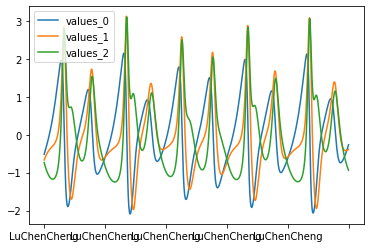

In [ ]:
p = train_[['values_0', 'values_1', 'values_2']].plot()

In [ ]:
import warnings; warnings.simplefilter('ignore')
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pylab
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint, solve_ivp

plt.style.use('bmh'); sns.set();sns.color_palette("tab10")
"Done"

'Done'

In [ ]:
# Berdasarkan Paper LuchenCheng
#Class LuChenCheng(DynSys):
#    staticjit
#    def _rhs(x, y, z, t, a, b, c,d,e,f):
#        xdot = -(a * b) / (a + b) * x + d * y * z + c           (PILIH d = -1)
#        ydot = a * y + e * x * z                                (PILIH e = 1 )
#        zdot = b * z + f * x * y                                (PILIH f = 1 )
#        return xdot, ydot, zdot

In [ ]:
def LuChenCheng(t,X,a,b,c):
  x,y,z = X
  dx = -(a * b) / (a + b) * x - y * z + c
  dy = a * y + x * z
  dz = b * z + x * y
  return [dx, dy, dz]


  
a, b, c = (-10, -4, 18.1)
Para = a, b, c
X = (0, 1, 20)
t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.01)
print("length t = ", len(t))
solint = odeint(LuChenCheng, X, t, Para, tfirst=True)
sol =  solve_ivp(LuChenCheng, t_span, X, args=Para)
type(sol), type(solint)

length t =  4000


(scipy.integrate._ivp.ivp.OdeResult, numpy.ndarray)

In [ ]:
solint.shape, solint

((4000, 3), array([[ 0.00000000e+00,  1.00000000e+00,  2.00000000e+01],
        [-5.69869585e-03,  9.03894188e-01,  1.92157422e+01],
        [ 1.32975813e-02,  8.18229169e-01,  1.84622971e+01],
        ...,
        [-7.26507711e+00, -1.24106282e-01,  9.69154911e+00],
        [-7.24851888e+00, -7.69469095e-01,  9.34402847e+00],
        [-7.17681590e+00, -1.32745946e+00,  9.05240486e+00]]))

In [ ]:
%matplotlib inline

Titles = ["odeint", "solve_ivp"]
data = ((solint[:, 0],solint[:, 1],solint[:, 2]), (sol.y[0, :], sol.y[1, :], sol.y[2, :]))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(solint[:, 0],
        solint[:, 1],
        solint[:, 2])
ax.set_title("odeint")
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(sol.y[0, :],
        sol.y[1, :],
        sol.y[2, :])
ax.set_title("solve_ivp")
plt.show()

In [ ]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 5.1 MB/s 
     |████████████████████████████████| 77 kB 5.0 MB/s 
     |████████████████████████████████| 708 kB 7.4 MB/s 
     |████████████████████████████████| 76.8 MB 12 kB/s 
     |████████████████████████████████| 1.8 MB 33.6 MB/s 
     |████████████████████████████████| 569 kB 55.5 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 11.2 MB 32.2 MB/s 
     |████████████████████████████████| 9.8 MB 39.4 MB/s 
     |████████████████████████████████| 1.6 MB 55.5 MB/s 
     |████████████████████████████████| 965 kB 38.6 MB/s 
     |████████████████████████████████| 529 kB 44.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: matplotlib
 

In [ ]:
import pandas as pd
df = pd.concat([train_, test_], ignore_index=True) # , keys=["Train", "Test", "Validation"]
df.drop(['id'], axis=1, inplace=True)
df = df[['values_0']]#sol[['time', 'values_0']]
df.columns = ['y']
print(df.shape)
df.head()

(2000, 1)


,y
0,-0.513531
1,-0.486062
2,-0.458487
3,-0.430736
4,-0.402753


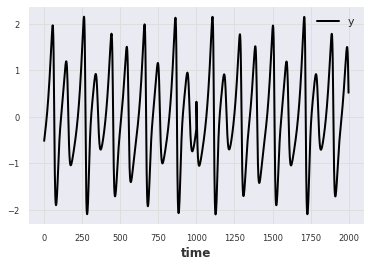

In [ ]:
import darts 

series = darts.TimeSeries.from_dataframe(df, time_col=None, value_cols='y')
series.plot()

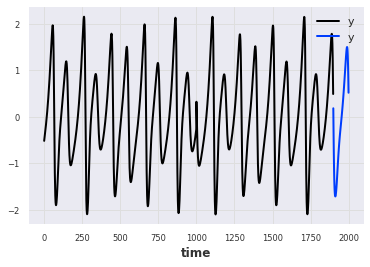

In [ ]:
train, test = series.split_before(0.95)
train.plot()
test.plot()

In [ ]:
from darts.models import RNNModel

model = RNNModel(model="GRU", input_chunk_length=20)
model.fit(train)
prediction = model.predict(len(test))

In [ ]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
from darts.metrics import mape

"MAPE: {:.2f}%".format(mape(prediction, test))